In [1]:
! pip install tensorflow

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built gast absl-py termcolor


## 使用Tensorflow 分類MNIST 數據

In [2]:
import tensorflow as tf

In [3]:
import os
os.mkdir('mnist')

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist", one_hot=True)

W0817 09:46:32.937018  5792 deprecation.py:323] From <ipython-input-4-91ef6a97d5b7>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0817 09:46:32.938018  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0817 09:46:32.939018  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist\train-images-idx3-ubyte.gz


W0817 09:46:33.677061  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0817 09:46:33.679060  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist\t10k-images-idx3-ubyte.gz


W0817 09:46:33.882072  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist\t10k-labels-idx1-ubyte.gz


### One Hot
- [小資女, 貴婦, 學生, 小資女, 貴婦] 
- [1,2,0,1,2]

        ``` 
        [
        [0,1,0],
        [0,0,1],
        [1,0,0],
        [0,1,0],
        [0,0,1],

        ]
        ```

### 檢視數據

In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000000A8A1BE0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000115853C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000124B8860>)

In [8]:
mnist.train.labels.shape

(55000, 10)

In [7]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
import numpy
numpy.argmax(mnist.train.labels[0])

7

In [12]:
mnist.test.labels.shape

(10000, 10)

In [15]:
mnist.train.images.shape

(55000, 784)

In [13]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
mnist.train.images[0].shape

(784,)

In [24]:
#mnist.train.images[0].reshape((392,2))

In [21]:
sample_image = mnist.train.images[0].reshape((28,28))

In [22]:
sample_image.shape

(28, 28)

Populating the interactive namespace from numpy and matplotlib


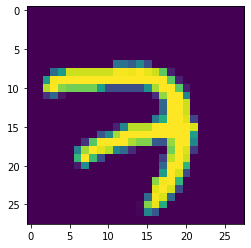

In [25]:
%pylab inline
import matplotlib.pyplot as plt

plt.imshow(sample_image)

### 設定網路參數

In [26]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [27]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

- 784 (input) => hidden1(256) => hidden2(256) => output(10)

### 定義Input & Output (Placeholder)

In [28]:
x = tf.placeholder("float", [None, n_input]) # 784 pixels
y = tf.placeholder("float", [None, n_classes]) # 10 digits

### 建構神經網路

In [29]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) # W * X + B
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 設定權重與偏倚(Variable)

In [30]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])), # 784 * 256
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), # 256 * 256
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))# 256 * 10
}

In [31]:

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])), # 256
    'b2': tf.Variable(tf.random_normal([n_hidden_2])), # 256
    'out': tf.Variable(tf.random_normal([n_classes]))  # 10 
}

### 建立模型

In [32]:
pred = multilayer_perceptron(x, weights, biases)

### 設定代價函數

- 784 (input) => hidden1(256) => hidden2(256) => output(10) => SoftMax => Cross Entropy

In [33]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

W0817 10:05:25.782813  5792 deprecation.py:323] From <ipython-input-33-c98ca870291b>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 初始化變量

In [34]:
init = tf.global_variables_initializer()

### 執行會話

In [35]:
# Start the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):

    # Initial the cost = 0.0
    avg_cost = 0.0

    total_batch = int(n_samples/batch_size) # 55000 / 100 = 550

    for i in range(total_batch): # 550

        batch_x, batch_y = mnist.train.next_batch(batch_size) # 100
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=162.63954968539153
Epoch: 2 cost=58.55973821640019
Epoch: 3 cost=42.77415552486071
Epoch: 4 cost=34.342986064390715
Epoch: 5 cost=29.041468033357106
Epoch: 6 cost=25.374405524947438
Epoch: 7 cost=22.484230911081493
Epoch: 8 cost=20.2814972386577
Epoch: 9 cost=18.46488879030401
Epoch: 10 cost=16.913518527773288
Epoch: 11 cost=15.684016455303532
Epoch: 12 cost=14.505820028375492
Epoch: 13 cost=13.619367648999802
Epoch: 14 cost=12.714606029770584
Epoch: 15 cost=11.960446925921866
Training Completed in 15 Epochs


### 評估模型

In [36]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [37]:
correct_predictions = tf.cast(correct_predictions, "float")

In [38]:
accuracy = tf.reduce_mean(correct_predictions)

In [39]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9136


## 使用TensorBoard 視覺化呈現網路建構過程

### 讀取MNIST數據集

In [40]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist", one_hot=True)

Extracting ./mnist\train-images-idx3-ubyte.gz
Extracting ./mnist\train-labels-idx1-ubyte.gz
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz


### 設定網路參數

In [41]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [42]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

### 定義Placeholders

In [43]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

### 產生影像檔

In [44]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

### 建構多層神經網路

In [45]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
            
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
            
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

### 添加隱藏層

In [46]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

### 設定代價函數

In [47]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

### 初始化變量

In [48]:
init = tf.global_variables_initializer()

### 訓練模型

In [49]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard3/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=158.2789852697198
Epoch: 2 cost=61.26732438694344
Epoch: 3 cost=45.19476784359327
Epoch: 4 cost=36.654014079353985
Epoch: 5 cost=31.002138905525197
Epoch: 6 cost=27.05141910119492
Epoch: 7 cost=24.055611841678633
Epoch: 8 cost=21.74014560786156
Epoch: 9 cost=19.77620756062594
Epoch: 10 cost=18.164622361985124
Epoch: 11 cost=16.743623175390738
Epoch: 12 cost=15.541510716568329
Epoch: 13 cost=14.447600691318511
Epoch: 14 cost=13.61334546051242
Epoch: 15 cost=12.724130941900336
Training Completed in 15 Epochs


### 打開tensorboard

- 打開 anaconda prompt
- tensorboard --logdir tensorboard3/ --host 127.0.0.1
- http://127.0.0.1:6006